In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

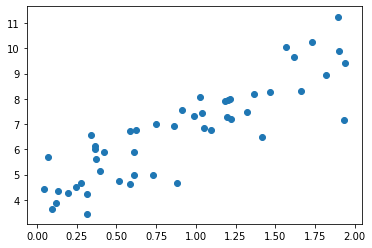

In [2]:
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

plt.figure()
plt.scatter(x, y)
plt.show()

In [3]:
def find_support_vectors(svm_reg):
    y_pred = svm_reg.predict(x)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [4]:
def plot_reg(svm_reg, axis):
    xs = np.linspace(axis[0], axis[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(xs)
    plt.plot(xs, y_pred, 'k-', linewidth=2)
    plt.plot(xs, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(xs, y_pred - svm_reg.epsilon, 'k--')
    support = find_support_vectors(svm_reg)
    plt.scatter(x[support], y[support], s=180, facecolors='#FFAAAA')
    plt.plot(x, y, 'bo')
    plt.axis(axis)

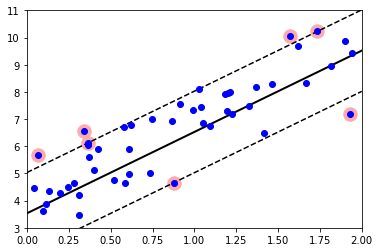

In [5]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg1.fit(x, y)

plot_reg(svm_reg1, [0, 2, 3, 11])

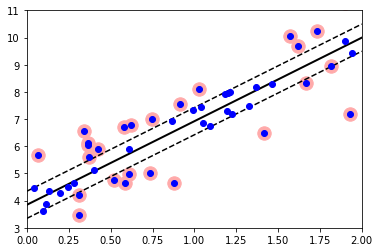

In [6]:
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg2.fit(x, y)
plot_reg(svm_reg2, [0, 2, 3, 11])

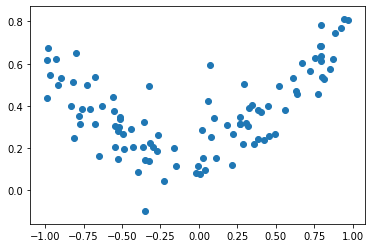

In [7]:
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()

plt.figure()
plt.scatter(x, y)
plt.show()

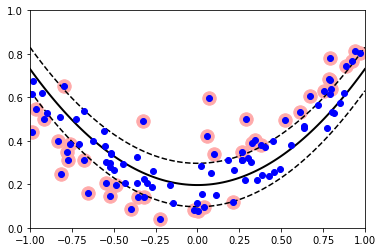

In [8]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg1.fit(x, y)

plot_reg(svm_poly_reg1, [-1, 1, 0, 1])

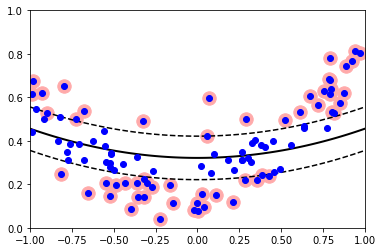

In [9]:
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1, gamma='auto')
svm_poly_reg2.fit(x, y)

plot_reg(svm_poly_reg2, [-1, 1, 0, 1])